# Machine Learning - SVM

* SVM aplicado na classificação de flores e na classificação de musicas do Sotify.
* O SVM será utilizado para a crtiação de classificador que identifica possiveis músicas que um usuario poderia gostar.
* Iremos treinar o algortimo, validar o modelo e fazer tuning dos parametros do SVM.

## Scripts e Base de Dados


In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

### Importando dataset iris

In [2]:
from sklearn import datasets

In [3]:
# Carregando o dataset para o array chamado iris que faz parte da biblioteca scikitlearn
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
# Visualizando o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Nomer das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Separando dados de treino
treino = iris.data

In [8]:
# Separando dadosd e classes.
classes = iris.target

In [9]:
# Visualizando a forma de array dos dados de treino.
# Formato (linhas, colunas)
# [ sepal lenght, sepal width, petal lenght, petal width]
treino.shape

(150, 4)

In [10]:
# Visualizando os dados de treino
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [11]:
# Visualizando a forma do array de classes
classes.shape

(150,)

In [12]:
# Visualizando os dados unicos do array de classes.
# {0: Iris Setosa, 1: Iris Versicolour, 2: Iris Virginica}
set(classes)

{0, 1, 2}

In [13]:
# Visualizando os dados de classes.
# {0: Iris Setosa, 1: Iris Versicolour, 2: Iris Virginica}
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualizaçãod de dados

## Visualizando a dispersão de daos quanta a classe

<IPython.core.display.Javascript object>


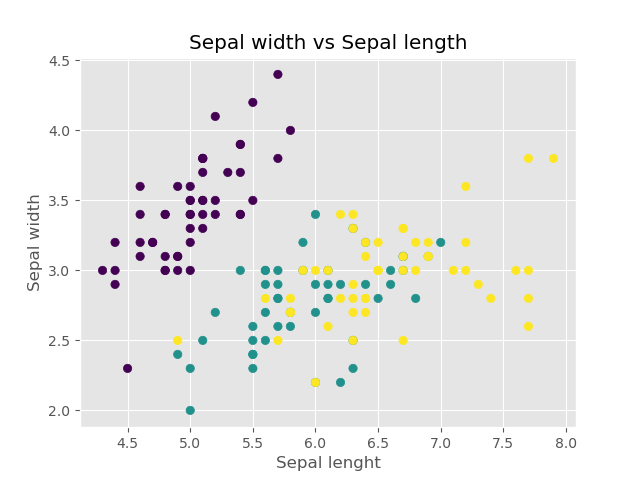

In [20]:
# Plotando gráfico de dispersão dos dados com relação a classe.
# Dispersão dos dados de Sepal width e SEpal Lenght com as classes (0,1,2)
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
# Sepal lenght vs sepal width
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes) #treino 1 e 2 colunda do treino / color = classes em cores diferentes 

<IPython.core.display.Javascript object>


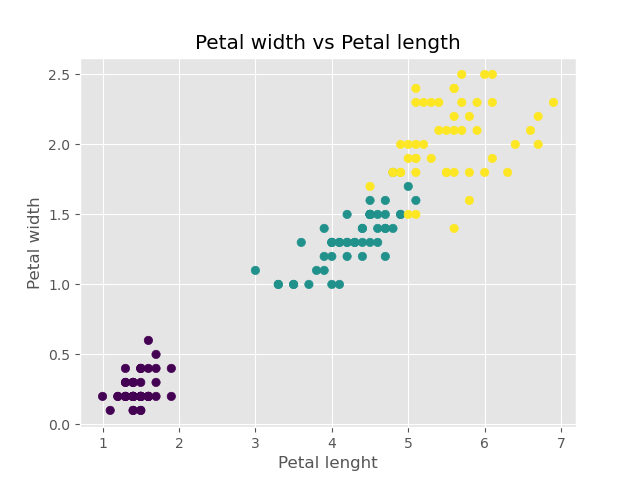

In [21]:
# Plotando gráfico de dispersão dos dados com relação a classe.
# Dispersão dos dados de Petal width e Petal Lenght com as classes (0,1,2)
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
# Sepal lenght vs sepal width
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.title('Petal width vs Petal length')
plt.scatter(treino[:,2],treino[:,3], c=classes)

# Aplicando o SVM

* Aplicando SVM para classificar flores usando a base de dados iris

In [22]:
# Usaremos 80% dos dados para treino e 20% para teste
# Visualizando o tamanho dos dados de treino
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [23]:
# Visualizando os dados correspondentes
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
# Visualizando as classes correspondentes
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
# Treinando o algoritmo de SVM
clf = svm.SVC().fit(treino[:-30], classes[:-30])

In [28]:
# objeto clf
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
# Criar um array com os dados de teste
# 20% dos dados que não foram testados
teste = treino[-30:]

In [30]:
# Visualizando os dados de teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [39]:
# Predizendo valores com a porção de dados de teste
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [35]:
# Criar um array com as classes dos dados de teste
classes_teste = classes[-30:]

In [36]:
# Visualizando as classes de teste
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

## Visualizando os Resultados de Classificação

<IPython.core.display.Javascript object>


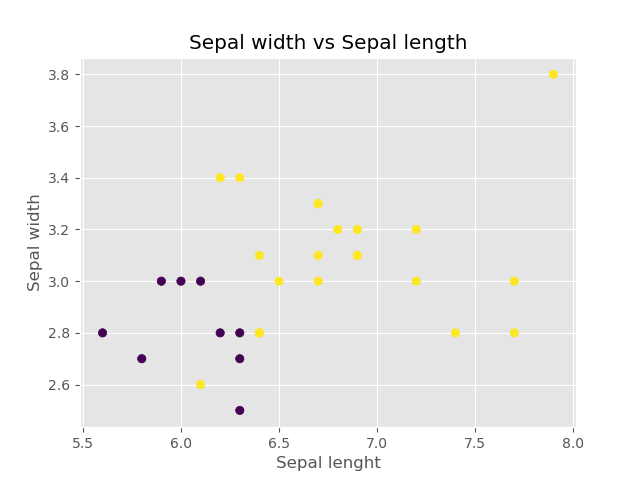

In [37]:
# Plotando gráfico de dispersão entre as colunas Sepal Lenght, Sepal width e classe
# Os pontos roxos são pontos no qual o classificador errou
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
# Sepal lenght vs sepal width
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0], treino[-30:,1], c=clf.predict(teste))

<IPython.core.display.Javascript object>


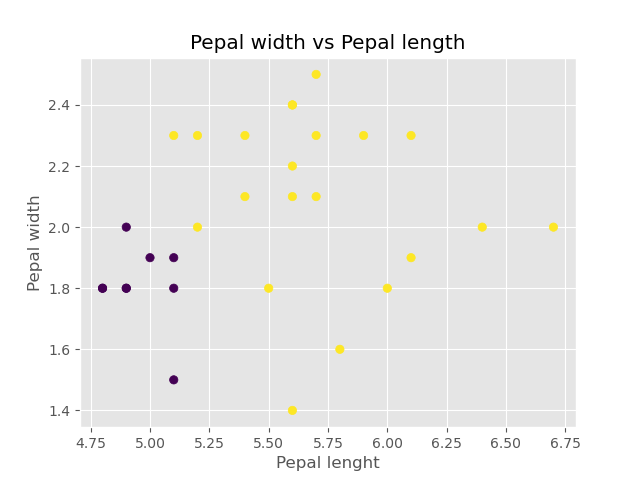

In [38]:
# Plotando gráfico de dispersão entre as colunas Pepal Lenght, Pepal width e classe
# Os pontos roxos são pontos no qual o classificador errou
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
# Sepal lenght vs sepal width
plt.xlabel('Pepal lenght')
plt.ylabel('Pepal width')
plt.title('Pepal width vs Pepal length')
plt.scatter(treino[-30:,2], treino[-30:,3], c=clf.predict(teste))

<IPython.core.display.Javascript object>


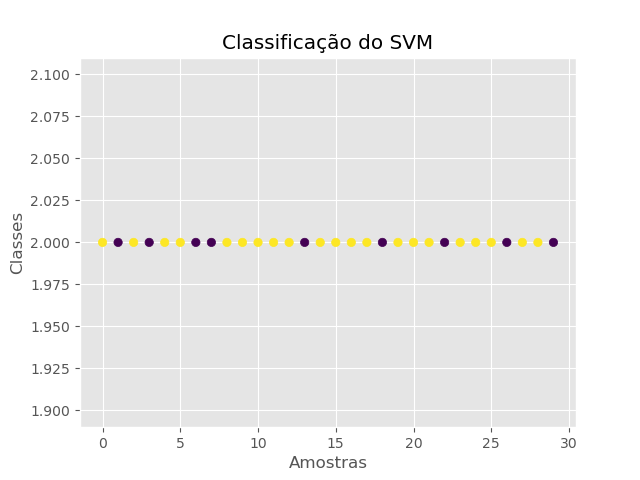

In [41]:
# Gráfico de instancias e predição destas
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
# Sepal lenght vs sepal width
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM')
plt.scatter(range(len(classes_teste)), classes_teste, c=clf.predict(teste))

## Matriz de Confusão

In [46]:
print (pd.crosstab(classes_teste,clf.predict(teste), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


 ## Cross Validation

In [49]:
# Função que retorna a acurácia após fazer cruzada (cross validation)
def Acuracia(clf, X, y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y, resultados)

In [50]:
Acuracia(clf, treino, classes)

0.9666666666666667

## Metricas de Avaliação

In [51]:
# Imprime as métricas: 'Precição, revocação e Medida F1.
resultados = cross_val_predict(clf, treino, classes, cv=5)
valor_classes = [0,1,2]
print(metrics.classification_report(classes, resultados, valor_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

